<a href="https://colab.research.google.com/github/JenFaith/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module1-linear-correlation-regression/Faith-LS_DS_131_Simple_Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unit 1, Sprint 2, Module 1

###Learning Objectives:
- Student can create a scatterplot
- Student can identify the independent and dependent variables in a relationship (also known as features and target, and explanatory and response variables)
- Student can identify linear and nonlinear relationships from a scatterplot
- Student can calculate and interpret linear correlation
- Student can calculate and interpret the slope and intercept of a simple linear regression model
- Sudent can predict a response from a simple linear regression model
- Student can calculate and interpret a residual

#Use the following information to answer questions 1 - 13 in the assignment:



###Is head size related to brain weight in healthy adult humans?

The Brainhead.csv dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characterizes such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed). 

**We wish to determine if there is a linear relationship between head size and brain weight in healthy human adults.**

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.

In [22]:
#Import the Brainhead.csv dataset from a URL and print the first few rows

import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


The two variables we are interested in - for now - are 

- Brain, the brain weight in g
- Head, the head size in cubic cm

1) If we wish to predict brain weight from head size, which variable is the independent variable (also called the feature, explanatory or x variable) and which variable is the dependent variable (also called the target, response or y variable)?

Answer here: 

The independent variable is head size. Dependent variable is brain weight since that is the variable we are trying to predict.

x=head size

y = brain weight

2) Draw a scatterplot showing the relationship between brain weight and head size.  Make sure to graph the correct variable on the correct axis and label your graph.

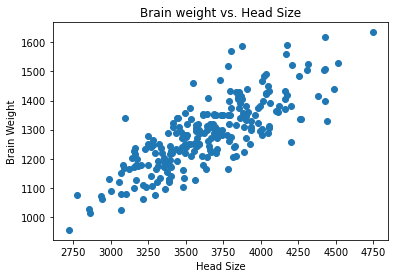

In [23]:
### YOUR CODE HERE ###

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.scatter(x = df['Head'], y = df['Brain'])

ax.set_title('Brain weight vs. Head Size')
ax.set_xlabel('Head Size')
ax.set_ylabel('Brain Weight')

plt.show()

3) Describe the strength and direction of the relationship between head size and brain weight.

Answer here: 

It appears there is a relatively strong positive correlation between head size and brain weight.

4) Determine if there is any missing data in the dataset.

In [24]:
### YOUR CODE HERE ###

df.isnull().sum()

Gender    0
Age       0
Head      0
Brain     0
dtype: int64

Answer here: 

No, there are no missing values.

5) Calculate and interpret the correlation coefficient for the relationship between head size and brain weight.  

In [36]:
### YOUR CODE HERE ###

cor = np.corrcoef(df['Head'], df['Brain'])
cor

array([[1.        , 0.79956971],
       [0.79956971, 1.        ]])

Answer here: 

6) Without doing any other calculations, determine the correlation of brain weight with head size.

Answer here: 

0.7996


7) Use Python to calculate the slope and intercept terms for the model of head size and brain weight.

In [37]:
### YOUR CODE HERE ###

from statsmodels.formula.api import ols

#Enter the model in the format Y ~ X

model = ols('Brain ~ Head', data = df).fit()
print(model.params)

Intercept    325.573421
Head           0.263429
dtype: float64


8) Use the model output above to write the linear model relating head size to brain weight (ie fill in the b terms with the correct numbers from above).

$$\hat{Y} = b_0 - b_1X$$



Answer here: 

$Y = 0.263429X + 325.5734$

9) What does the slope term tell us about the relationship between head size and brain weight?

Answer here: 

The brain size increases slower than the head size. That is, for each one unit increase of head size, brain size increases less than a quarter of a unit.

10) What does the intercept tell us about the relationship between head size and brain weight?

Answer here: 

We don't need to interpret the meaning of the intercept since their is no head value of zero in our dataset. 

11) Draw a scatterplot with the regression line overlayed on top of the points.

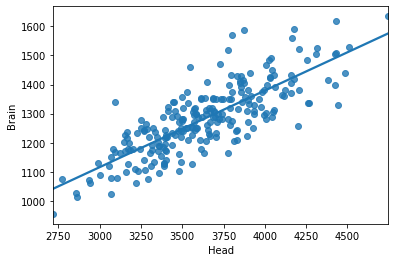

In [16]:
### YOUR CODE HERE ###

import seaborn as sns

ax = sns.regplot(x = df['Head'], y = df['Brain'], data = df, ci=None)


12) A healty human has a brain size of 4100 cubic cm, how much do we expect his or her brain to weigh?

In [40]:
### YOUR CODE HERE ###

brain_y = (0.263429*4100) + 325.5734
brain_y

1405.6323

Answer here

754.4855 grams

13) Calculate and interpret the model residual for for the first observation in the dataset (head size = 4512 cubic cm).

In [18]:
df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [41]:
### YOUR CODE HERE ###
brain_1 = (0.263429*4512) + 325.5734
brain_1

residual = 1530 - brain_1
residual

15.83495199999993

Answer here:

15.83

#Use the following information to answer questions 14 - 16 in the assignment:



Import the Sleep.csv dataset from a URL and print the first few rows

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables  for a selection of mammal species. This data appears in the Sleep.csv dataset. 


Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.



Data Dictionary:

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



In [42]:
data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv'

sleep = pd.read_csv(data_url, skipinitialspace=True, header=0)

sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


14) Write a function that replaces the _ in each animal name with a space.  Eg. Asian_elephant = Asian elephant.  Hint: use the string.replace(old, new, count) function.

In [54]:
### YOUR CODE HERE ###
def editor(word):
  return (word.replace("_", " "))

sleep['Animal'] = sleep['Animal'].apply(editor)

sleep.head()


,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African giant pouched rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big brown bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


15) Plot the relationship between life expectancy and total sleep and gestation time and total sleep.

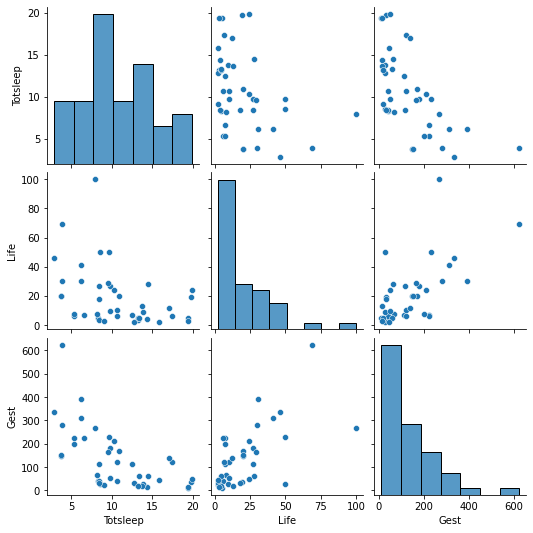

In [56]:
### YOUR CODE HERE ###

import seaborn as sns
to_plot = sleep[['Totsleep', 'Life', 'Gest']]
sns.pairplot(to_plot)

16) Calculate the correlation between life expectancy and total sleep and between gestation time and total sleep.

In [58]:
### YOUR CODE HERE ###

life_sleep = np.corrcoef(sleep['Life'], sleep['Totsleep'])

print(life_sleep)

gest_sleep = np.corrcoef(sleep['Gest'], sleep['Totsleep'])
print(gest_sleep)

[[ 1.         -0.38244618]
 [-0.38244618  1.        ]]
[[ 1.         -0.61447431]
 [-0.61447431  1.        ]]


#Portfolio Project Assignment.

We're coming into the home stretch!  Finalize your project results.  Ask any lingering questions, and complete any revisions you have.  This would be a good time to have a classmate take a look at your project and point out anything missing or any obvious errors (they happen to everyone!).